In [1]:
import pandas as pd
import spacy
from spacy.tokens import Token
from spacy.lang.en import English
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import textacy
from collections import Counter

Empezamos por cargar los datasets con los que vamos a trabajar.


In [2]:
#Si utilizamos el encoding ISO-8859-1 el lector de pandas atumaticamente interpretara a las strings del documento como
#elementos spacy (tokens, docs). El problema es que no esta tokenizadas por palabras.

df1 = pd.read_csv('../datasets/GEN-sarc-notsarc (1).csv') #encoding='ISO-8859-1')
df2 = pd.read_csv('../datasets/HYP-sarc-notsarc.csv') #encoding='ISO-8859-1')
df3 = pd.read_csv('../datasets/RQ-sarc-notsarc.csv') #encoding='ISO-8859-1')

#df1 = pd.read_csv('C:\\Users\\rubin\\Desktop\\DiploDatos\\Ment-Sarcasmo\\sarcasm_v2\\GEN-sarc-notsarc.csv')
#df2 = pd.read_csv('C:\\Users\\rubin\\Desktop\\DiploDatos\\Ment-Sarcasmo\\sarcasm_v2\\HYP-sarc-notsarc.csv')
#df3 = pd.read_csv('C:\\Users\\rubin\\Desktop\\DiploDatos\\Ment-Sarcasmo\\sarcasm_v2\\RQ-sarc-notsarc.csv')


Comenzamos a tokenizar. Para esto usaremos una función que armamos con un tokenizador de la librería spacy.

In [3]:
#Con esta funcion podemos tokenizar una pd series y luego reemplazarla en el df.
def column_tokenizer(dataframe, column_name='', sw_lemma=True):
    '''Devuelve una lista tokenizada y el lower case de los documentos
    de la columna de un pandas df, como objetos doc.spacy y token.spacy. Si 
    sw_lemma=True ademas lematiza y remueve stopwords'''
    if sw_lemma:
        nlp = spacy.load('en_core_web_sm', disable = ['parser'],) #'ner','tagger'])        
        all_stopwords = nlp.Defaults.stop_words
        df_tk_txt = []
        for row in dataframe[column_name]:
            df_tk_txt.append(nlp(row.lower()))
        df_lemmatized = []
        for doc in df_tk_txt:
            df_lemmatized.append(nlp(" ".join([token.lemma_ for token in doc if token not in all_stopwords and token.is_punct == False])))
        return df_lemmatized
    else:    
        nlp = English()
        tokenizer = nlp.Defaults.create_tokenizer(nlp)
        df_tk_txt = []
        for row in dataframe[column_name]:
            df_tk_txt.append(tokenizer(row.lower(), min_freq=0))
        return df_tk_txt

Normalizamos las columnas text de los datasets, tokenizando, llevando a lower case, lemmatizando y removiendo stopwords.

In [4]:
df1_nm = df1
df2_nm = df2
df3_nm = df3
df1_nm['text'] = column_tokenizer(df1_nm, column_name= 'text', sw_lemma=True)
df2_nm['text'] = column_tokenizer(df2_nm, column_name= 'text', sw_lemma=True)
df3_nm['text'] = column_tokenizer(df3_nm, column_name= 'text', sw_lemma=True)

#### tf idf

Ahora buscamos la forma de calcular el **tf idf** (spacy no tiene un metodo o funcion para calcularla, asi que debemos hechar mano a alguna que otra libreria). En este caso utilizamos la biblioteca sklearn, que posee muy buena sinergía con pandas. Aprovechando que los datos están estructurados en un csv, echamos mano del modelo count vectorizer. Esto implica una desviación del pipeline, dado que sklearn no trabaja con objetos de la librería spacy. Debido a esto (y al costo computacional) aplicaremos tfidf a un solo dataset.

In [5]:
df1_tfidf = pd.read_csv('../datasets/GEN-sarc-notsarc (1).csv')
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df1_tfidf['text'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_tdif = pd.DataFrame(denselist, columns=feature_names)
df_tdif

,00,000,005,01,018,02,03,035,03angi,0422,...,zoo,zoos,zorach,zorba,zpq0120756920001,zsu,zsu2357,zwingli,zygote,zygotes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En este punto podemos hacer varias visualizaciones sobre la informaciones. Por ejemplo, podemos visualizar la distribución de los valores de tfidf de una feature a lo largo de todos los documentos. Mostramos cómo ejemplo la palabra "what". Vemos que en la mayoría de los documentos tiene un valor de 0, indicando que no ocurre, mientras que en aquellos que ocure, su tf-idf no es mayor a 0.1.

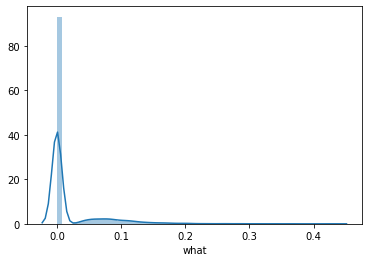

In [6]:
x = df_tdif['what']
sns.distplot(x)

Aquí dejamos otras funciones para acceder desde objetos spacy a las frecuencias que hacen al tf-idf. No las aplicamos por una cuestión de tiempo y recursos.

In [7]:
#Definimos estas dos funciones: docs_counter genera la frecuencia totald e palabras de todo el corpora, mientras que
#word_counter genera la frecuencia de palabras de un documento.
    
    
def docs_counter(docs):
    word_count = Counter()
    for doc in docs:
        for token in doc:
            word_count[str(token)] += 1
    return word_count

def word_counter(doc):
    word_count = Counter()
    for token in doc:
        word_count[str(token)] += 1
    return word_count

def t_f(doc):
    word_doc = dict(doc)
    count = sum(doc.values())
    word_tf  = {}
    for key in word_doc:
        word_tf.update( {key : word_doc[key]/count} )
    return word_tf   

def computeIDF(documents):
    N = len(documents)
    idfDict = {}
    for document in documents:
        for key  in document:
            for document in documents:
                if key in document:
                    idfDict[key] += 1
    
    for key, val in idfDict.items():
        idfDict[key] = math.log(N / float(val))
    return idfDict 
            

 #### n-gramas.
 Se obtiene la frecuencia general de los n-gramas en cada uno de los corpora a a partir de los dc spacy.

In [8]:
# Con esta función se obtienen los n-gramas de cada documento, se utiliza la librería textacy que pertenece a spacy.
def ngrams(doc, n):
    df = []
    for word in doc:
        df.append(list(textacy.extract.ngrams(word, n, min_freq=0,  filter_stops = False)))
    return df

In [9]:
df1_nm_ngram = ngrams(df1_nm['text'], 2)
df2_nm_ngram = ngrams(df2_nm['text'], 2)
df3_nm_ngram = ngrams(df3_nm['text'], 2)

In [10]:
freq_ngram_1 = docs_counter(df1_nm_ngram).most_common()
freq_ngram_2 = docs_counter(df2_nm_ngram).most_common()
freq_ngram_3 = docs_counter(df3_nm_ngram).most_common()

Se obtiene la frecuencia de los n-gramas pero por documentos.

In [11]:
freq_ngram_doc_1 = [word_counter(doc) for doc in df1_nm_ngram]
freq_ngram_doc_2 = [word_counter(doc) for doc in df2_nm_ngram]
freq_ngram_doc_3 = [word_counter(doc) for doc in df3_nm_ngram]

Los enegramas nos muestran relaciones entre palabras que quedan invisibilizadas a primera visa si solo consideramos tokens individuales o palabras aisaldas. Son muy valisoos pues su información computacional se despliega con los modelos de entrenamiento a un nivel que a primera vista no podemos mesurar.Sin embargo, tomamos la decisión aquí de trabajar solo con enegramas de hasta dos palabras, pues el trabajo comutacional de seguir trabajando con ngramas de amyor grado supera las capacidades de nuestras computadoras 

Se reemplazan las palabras con mucha variabilidad por un placeholder

In [12]:
def placeholder(docs):
    placeholder = []
    for doc in docs:
        for token in doc:
            tags = token.pos_
            if tags == "NUM":
                doc = str(doc).replace(str(token), "DIGIT")
        placeholder.append(doc)
    return placeholder

In [13]:
pl_holder_1 = placeholder(df1_nm['text'])
pl_holder_2 = placeholder(df2_nm['text'])
pl_holder_3 = placeholder(df3_nm['text'])

La potencia de los placeholders reside en su capacidad para cortar la dimensionalidad de los vectores de palabras. Muchas veces tenemos conjuntos de palabras cuya naturaleza no aporta mucha información al problema. Desde un punto de vista estadístico linguístico, podríamos considerar la implementación de los placeholders como soluciones empíricas a los problemas que presentan, por ejemplo, la frecuncia de palabras muy bajas o las stopwords. 

#### Se reconocen las entidades y sus frecuencias en el corpora.


In [14]:
tags = []
for doc in df1_nm['text']:
    for token in doc:
        tags.append(token.pos_)

In [15]:
word_counter(tags).most_common()

[('NOUN', 56614),
 ('VERB', 36338),
 ('DET', 31199),
 ('ADP', 24755),
 ('ADJ', 24437),
 ('AUX', 23220),
 ('ADV', 20522),
 ('PUNCT', 18537),
 ('PART', 12203),
 ('PROPN', 9651),
 ('PRON', 9006),
 ('CCONJ', 8976),
 ('SCONJ', 8499),
 ('SPACE', 3420),
 ('NUM', 2788),
 ('INTJ', 2382),
 ('X', 1682),
 ('SYM', 193)]

Se identifica la similitud de palabras.

In [16]:
def simil(docs):
    for w1 in docs:
        for w2 in docs:
            print((w1.text, w2.text),' tienen una similaridad de: ', w1.similarity(w2))

In [17]:
df1_simil = simil(df1_nm['text'][0])

('if', 'if')  tienen una similaridad de:  1.0
('if', 'that')  tienen una similaridad de:  0.2003829
('if', 'be')  tienen una similaridad de:  0.014723228
('if', 'true')  tienen una similaridad de:  0.1247472
('if', 'then')  tienen una similaridad de:  0.32815984
('if', 'freedom')  tienen una similaridad de:  0.027155295
('if', 'of')  tienen una similaridad de:  0.33316016
('if', 'speech')  tienen una similaridad de:  0.06034837
('if', 'be')  tienen una similaridad de:  0.07928275
('if', 'doom')  tienen una similaridad de:  0.20957808
('if', 'harassment')  tienen una similaridad de:  -0.051079396
('if', 'be')  tienen una similaridad de:  0.051761236
('if', 'subjective')  tienen una similaridad de:  0.13279614
('if', 'now')  tienen una similaridad de:  0.22487116
('if', 'i')  tienen una similaridad de:  0.1730055
('if', 'can')  tienen una similaridad de:  -0.15280232
('if', 'claim')  tienen una similaridad de:  -0.023919519
('if', 'that')  tienen una similaridad de:  0.47389248
('if', 'a

<ipython-input-16-92e5f5bd3d97>:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print((w1.text, w2.text),' tienen una similaridad de: ', w1.similarity(w2))


 0.10935188
('i', 'then')  tienen una similaridad de:  0.11418854
('i', 'freedom')  tienen una similaridad de:  0.038094968
('i', 'of')  tienen una similaridad de:  0.04345669
('i', 'speech')  tienen una similaridad de:  0.14579901
('i', 'be')  tienen una similaridad de:  0.018967729
('i', 'doom')  tienen una similaridad de:  0.08897731
('i', 'harassment')  tienen una similaridad de:  0.18713257
('i', 'be')  tienen una similaridad de:  -0.109602414
('i', 'subjective')  tienen una similaridad de:  -0.010130783
('i', 'now')  tienen una similaridad de:  0.12418774
('i', 'i')  tienen una similaridad de:  1.0
('i', 'can')  tienen una similaridad de:  -0.18635876
('i', 'claim')  tienen una similaridad de:  -0.12512696
('i', 'that')  tienen una similaridad de:  0.016048897
('i', 'a')  tienen una similaridad de:  0.023293877
('i', 'book')  tienen una similaridad de:  0.13005404
('i', 'i')  tienen una similaridad de:  1.0
('i', 'do')  tienen una similaridad de:  -0.038980722
('i', 'not')  tiene

('-PRON-', 'be')  tienen una similaridad de:  0.03856206
('-PRON-', 'true')  tienen una similaridad de:  0.13159776
('-PRON-', 'then')  tienen una similaridad de:  -0.10865013
('-PRON-', 'freedom')  tienen una similaridad de:  0.11533956
('-PRON-', 'of')  tienen una similaridad de:  0.11098407
('-PRON-', 'speech')  tienen una similaridad de:  0.14770074
('-PRON-', 'be')  tienen una similaridad de:  0.12685783
('-PRON-', 'doom')  tienen una similaridad de:  0.08218168
('-PRON-', 'harassment')  tienen una similaridad de:  0.16172187
('-PRON-', 'be')  tienen una similaridad de:  0.013898109
('-PRON-', 'subjective')  tienen una similaridad de:  -0.022013795
('-PRON-', 'now')  tienen una similaridad de:  -0.045272898
('-PRON-', 'i')  tienen una similaridad de:  0.1303855
('-PRON-', 'can')  tienen una similaridad de:  0.06492424
('-PRON-', 'claim')  tienen una similaridad de:  0.075684525
('-PRON-', 'that')  tienen una similaridad de:  -0.11603953
('-PRON-', 'a')  tienen una similaridad de: 

Reconocimiento de entidades.

In [18]:
def clasif(dataframe):
    dataframe = dataframe.rename(columns={'class':'clasif','id':'id', 'text':'text'})
    dataframe = pd.DataFrame(dataframe, columns = ['clasif', 'id', 'text'])
    return dataframe

In [19]:
df_1 = clasif(df1)
df_2 = clasif(df2)
df_3 = clasif(df3)

In [20]:
df_1 

,clasif,id,text
0,notsarc,1,"(if, that, be, true, then, freedom, of, speech..."
1,notsarc,2,"(neener, neener, be, -PRON-, time, to, go, in,..."
2,notsarc,3,"(just, like, the, plastic, gun, fear, the, arm..."
3,notsarc,4,"(so, geology, be, a, religion, because, -PRON-..."
4,notsarc,5,"(well, do, monty, mark, that, up, as, -PRON-, ..."
...,...,...,...
6515,sarc,6516,"(depend, on, when, the, baby, bird, die, , ..."
6516,sarc,6517,"(ok, sheesh, to, clarify, woman, who, be, not,..."
6517,sarc,6518,"(so, , eh, , how, s, this, sound, , w..."
6518,sarc,6519,"(i, think, -PRON-, should, put, to, a, vote, t..."


In [21]:
sarcasmo = df_1[df_1.clasif == "sarc"]
notsarcasmo = df_1[df_1.clasif == "notsarc"]

In [22]:
def entity_recognition(docs):
    entity = []
    for doc in docs:
        for ent in doc.ents:
             entity.append(ent.label_)
    return entity

In [23]:
ent_sarcasmo_1 = entity_recognition(sarcasmo['text'])
count_sarc_1 = word_counter(ent_sarcasmo_1)
nuevo_1 = pd.DataFrame.from_dict(count_sarc_1, orient='index')

In [24]:
nuevo_1


,0
ORDINAL,111
EVENT,2
CARDINAL,519
PERSON,538
NORP,366
ORG,294
GPE,300
DATE,312
LAW,31
LOC,65


In [25]:
ent_notsarcasmo_1 = entity_recognition(notsarcasmo['text'])
count_notsarc_1 = word_counter(ent_notsarcasmo_1)
nuevo_2 = pd.DataFrame.from_dict(count_notsarc_1, orient='index')

In [26]:
total = entity_recognition(df1_nm['text'])
count_total = word_counter(total)
nuevo_3 = pd.DataFrame.from_dict(count_total, orient='index')

In [27]:
# Se comparan las frecuencias de entidades entre los comentarios sarcásticos y no sarcásticos
concatenado = pd.concat([nuevo_1, nuevo_2, nuevo_3], axis=1)
concatenado.columns = ['Frec_sarc_1', 'Frec_notsarc_2', 'Total']
concatenado

,Frec_sarc_1,Frec_notsarc_2,Total
ORDINAL,111,227,338
EVENT,2,14,16
CARDINAL,519,933,1452
PERSON,538,476,1014
NORP,366,393,759
ORG,294,375,669
GPE,300,403,703
DATE,312,547,859
LAW,31,64,95
LOC,65,112,177


##### Nota final
El heatmap y el corte o filtro de palabras fueron realizados en el práctico número 1, por eso no los hemos realizado aquí.